# Lógica fuzzy: risco de um ataque cardíaco

- Antecedentes:
    - Calorias consumidas (dieta): baixa & alta;
    - Calorias gastas (exercícios): baixa & alta;

- Consequente:
    - Probabilidade ataque cardíaco: baixa & alta.

Conjunto de Regras:
1. se dieta é baixa E exercício é alto então probabilidade é baixa;
2. se dieta é alta OU exercício é baixo então probabilidade é alta.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
calorias_consumidas = ctrl.Antecedent(np.arange(0,5_000+1,500),
                                  "calorias consumidas")
calorias_gastas = ctrl.Antecedent(np.arange(0,2_000+1,500),
                                  "calorias gastas")

probabilidade_ataque = ctrl.Consequent(np.arange(0,100+1,50),
                                       "probabilidade ataque")

## Membership functions

In [3]:
calorias_consumidas['baixa'] = fuzz.trimf(calorias_consumidas.universe,
                                          [0, 0, 5_000])
calorias_consumidas['alta'] = fuzz.trimf(calorias_consumidas.universe,
                                         [2_500, 2_500, 5_000])

In [4]:
calorias_gastas['baixa'] = fuzz.trimf(calorias_gastas.universe,
                                      [0, 0, 2_000])
calorias_gastas['alta'] = fuzz.trimf(calorias_gastas.universe,
                                     [1_000, 1_000, 2_000])

t:\college\College_tasks\7_Seventh_semester\AI\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


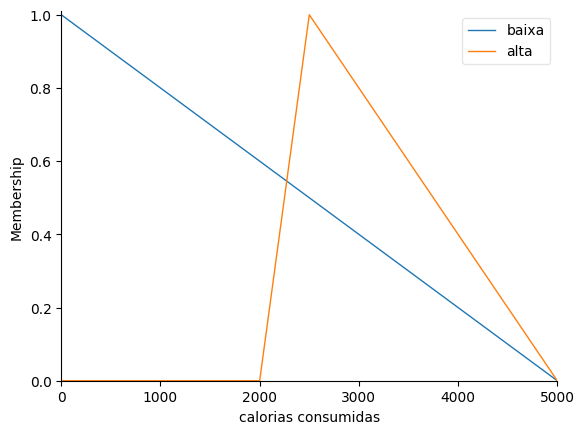

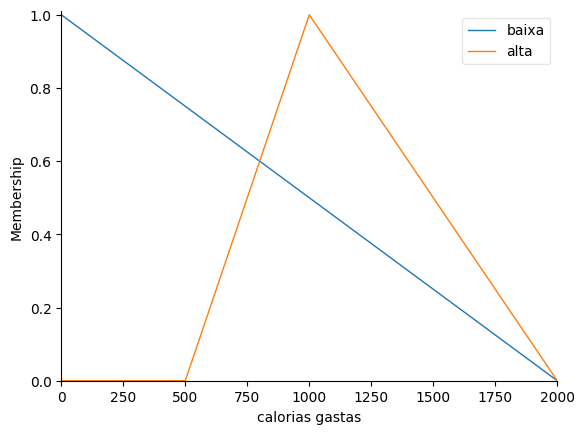

In [5]:
calorias_consumidas.view()
calorias_gastas.view()

In [6]:
probabilidade_ataque['baixa'] = fuzz.trimf(probabilidade_ataque.universe,
                                           [0, 0, 100])
probabilidade_ataque['alta'] = fuzz.trimf(probabilidade_ataque.universe,
                                          [50, 50, 100])


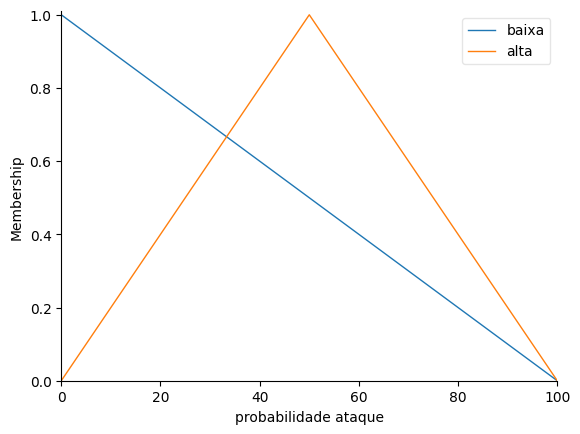

In [7]:
probabilidade_ataque.view()

## Regras do sistema

In [8]:
regra1 = ctrl.Rule(
    calorias_consumidas['baixa'] & calorias_gastas['alta'],
    probabilidade_ataque['baixa'])

regra2 = ctrl.Rule(
    calorias_consumidas['alta'] | calorias_gastas['baixa'],
    probabilidade_ataque['alta'])

## Sistema de controle

In [9]:
sistema_controle = ctrl.ControlSystem(
    [regra1, regra2])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

Risco de ataque: 44.76%


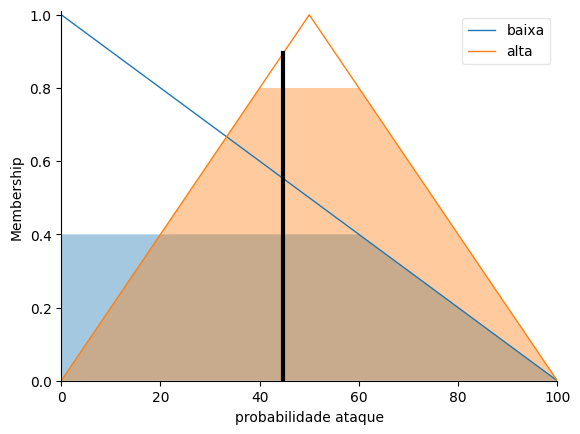

In [10]:
# Exemplo de teste
sistema.input['calorias consumidas'] = 3_000
sistema.input['calorias gastas'] = 1_000
sistema.compute()

print(f"Risco de ataque: {sistema.output['probabilidade ataque']:.2f}%")

probabilidade_ataque.view(sim = sistema)